In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
#load datashet
print("Load MNIST Database")
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=np.reshape(x_train,(60000,784))/255.0
x_test= np.reshape(x_test,(10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])
print("----------------------------------")
print(x_train.shape)
print(y_train.shape)

Load MNIST Database
----------------------------------
(60000, 784)
(60000, 10)


In [3]:
def sigmoid(x):
 return 1./(1.+np.exp(-x))
def softmax(x):
 return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))
def Forwardpass(X,Wh,bh,Wo,bo):
 zh = X@Wh.T + bh
 a = sigmoid(zh)
 z=a@Wo.T + bo
 o = softmax(z)
 return o
def AccTest(label,prediction): # calculate the matching score
    OutMaxArg=np.argmax(prediction,axis=1)
    LabelMaxArg=np.argmax(label,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy

In [4]:
learningRate = 0.5
Epoch=50
NumTrainSamples=60000
NumTestSamples=10000
NumInputs=784
NumHiddenUnits=512
NumClasses=10
#inital weights
#hidden layer
Wh=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh= np.zeros((NumHiddenUnits,NumInputs))
dbh= np.zeros((1,NumHiddenUnits))
#Output layer
Wo=np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo= np.random.uniform(0,0.5,(1,NumClasses))
dWo= np.zeros((NumClasses,NumHiddenUnits))
dbo= np.zeros((1,NumClasses))

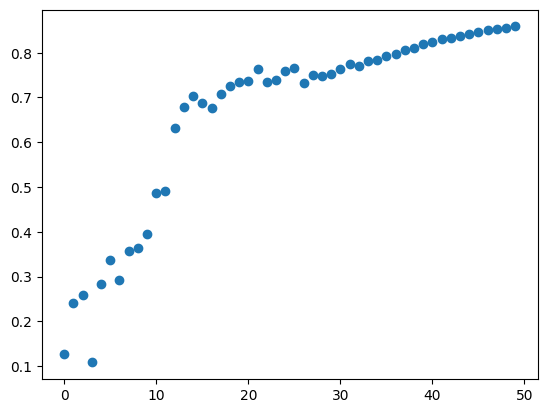

In [8]:
from IPython.display import clear_output
loss = []
Acc = []
for ep in range (Epoch):
    #feed fordware propagation
    x = x_train
    y=y_train
    zh = x@Wh.T + bh
    a = sigmoid(zh)
    z=a@Wo.T + bo
    o = softmax(z)
    #calculate loss
    loss.append(-np.sum(np.multiply(y,np.log10(o))))
    #calculate the error for the ouput layer
    d = o-y
    #Back propagate error
    dh = d@Wo
    dhs = np.multiply(np.multiply(dh,a),(1-a))
    #update weight
    dWo = np.matmul(np.transpose(d),a)
    dbo = np.mean(d) # consider a is 1 for bias
    dWh = np.matmul(np.transpose(dhs),x)
    dbh = np.mean(dhs) # consider a is 1 for bias
    Wo =Wo - learningRate*dWo/NumTrainSamples
    bo =bo - learningRate*dbo
    Wh =Wh-learningRate*dWh/NumTrainSamples
    bh =bh-learningRate*dbh
    #Test accuracy with random innitial weights
    prediction = Forwardpass(x_test,Wh,bh,Wo,bo)
    Acc.append(AccTest(y_test,prediction))
    clear_output(wait=True)
    plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
    plt.show()

In [10]:
prediction = Forwardpass(x_test,Wh,bh,Wo,bo)
Rate = AccTest(y_test,prediction)
print(Rate)

0.8587


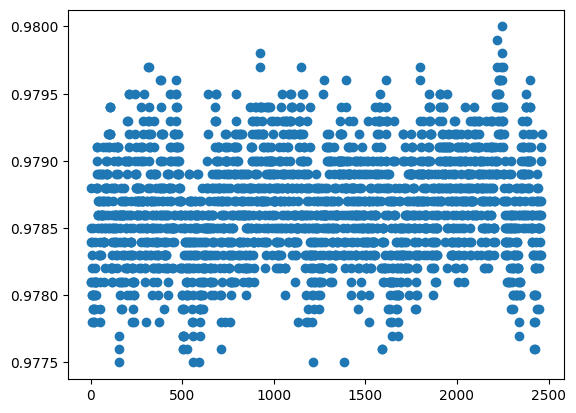

KeyboardInterrupt: 

In [17]:
from IPython.display import clear_output
loss = []
Acc = []
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
    np.random.shuffle(Stochastic_samples)
    for ite in range (0,NumTrainSamples,Batch_size):
    #feed fordware propagation
        Batch_samples = Stochastic_samples[ite:ite+Batch_size]
        x = x_train[Batch_samples,:]
        y=y_train[Batch_samples,:]
        zh = x@Wh.T + bh
        a = sigmoid(zh)
        z=a@Wo.T + bo
        o = softmax(z)
        #calculate loss
        loss.append(-np.sum(np.multiply(y,np.log10(o))))
        #calculate the error for the ouput layer
        d = o-y
        #Back propagate error
        dh = d@Wo
        dhs = np.multiply(np.multiply(dh,a),(1-a))
        #update weight
        dWo = np.matmul(np.transpose(d),a)
        dbo = np.mean(d) # consider a is 1 for bias
        dWh = np.matmul(np.transpose(dhs),x)
        dbh = np.mean(dhs) # consider a is 1 for bias
        Wo =Wo - learningRate*dWo/Batch_size
        bo =bo - learningRate*dbo
        Wh =Wh-learningRate*dWh/Batch_size
        bh =bh-learningRate*dbh
        #Test accuracy with random innitial weights
        prediction = Forwardpass(x_test,Wh,bh,Wo,bo)
        Acc.append(AccTest(y_test,prediction))
        clear_output(wait=True)
        plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
        plt.show()
    print('Epoch:', ep )
    print('Accuracy:',AccTest(y_test,prediction) )

In [15]:
from IPython.display import clear_output
loss = []
Acc = []
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
    np.random.shuffle(Stochastic_samples)
    for ite in range (0,NumTrainSamples,Batch_size):
        #feed fordware propagation
        Batch_samples = Stochastic_samples[ite:ite+Batch_size]
        x = x_train[Batch_samples,:]
        y=y_train[Batch_samples,:]
        zh = x@Wh.T + bh
        a = sigmoid(zh)
        z=a@Wo.T + bo
        o = softmax(z)
        #calculate loss
        loss.append(-np.sum(np.multiply(y,np.log10(o))))
        #calculate the error for the ouput layer
        d = o-y
        #Back propagate error
        dh = d@Wo
        dhs = np.multiply(np.multiply(dh,a),(1-a))
        dWo = np.matmul(np.transpose(d),a)
        dbo = np.mean(d) # consider a is 1 for bias
        dWh = np.matmul(np.transpose(dhs),x)
        dbh = np.mean(dhs) # consider a is 1 for bias
        Wo =Wo - learningRate*dWo/Batch_size
        bo =bo - learningRate*dbo
        Wh =Wh-learningRate*dWh/Batch_size
        bh =bh-learningRate*dbh
#Test accuracy with random innitial weights
prediction = Forwardpass(x_test,Wh,bh,Wo,bo)
Acc.append(AccTest(y_test,prediction))
print('Epoch:', ep )
print('Accuracy:',AccTest(y_test,prediction) )

Epoch: 49
Accuracy: 0.9779
